<a href="https://colab.research.google.com/github/FS-Tamim/City-Life-Cycle-Open-GL-project/blob/main/Binary_cnn%2Cbilstm%2Ccnn%2Bbilstm_glove_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re

# Importing required libraries
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

# keras
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical

from keras.layers import Embedding

from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Dropout,concatenate
from keras.layers.core import Reshape, Flatten
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.models import Model
from keras import regularizers

# gensim
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

In [2]:

    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

stop_words =  set(open('/content/drive/MyDrive/Colab Notebooks/Hostalisty detection system/bd_stopword.txt').read().split())
stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(text):
    return stop_words.sub(" ", text)

def rem_emoticons(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def rem_special_characters(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', text)

def rem_non_bangla_characters(text):
    pattern = re.compile('[A-Za-z0-9]', flags=re.I)
    return pattern.sub(r'', text)

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hostalisty detection system/Hostility_dataset - Hostility_Dataset_main_suffeld.csv")
df

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,5515,এটাই তো এখনার জুগের মেয়েরা বুঝে না যে তাদের ...,1,1,1,0,0,0
1,10492,: একটা দেশের মন্ত্রী কতো টা নির্লজ্জ হলে এমন ...,0,0,0,0,0,0
2,7219,"আজকের এই পবিত্র দিনে তোরে গালি দিলাম না , ঈদট...",1,1,0,0,0,1
3,10353,আজব একটা মানুষ তুমি ! দুঃখের গল্প বললেও তুমি ...,0,0,0,0,0,0
4,9216,আপনাকে সামনে থেকে দেখলে একটু সালাম করতাম,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
10532,7444,হ্লাত প্রতিবন্ধী হয়ে গেছে! ওরে কেউ এক সামুচ গু...,1,1,0,0,0,1
10533,7495,হ্লাপুত তুই এই দুইটা কি হোগা ম্রা কোটায় পাইছত?,1,1,0,0,0,1
10534,629,হ্লার পৌ হ্লা,1,0,1,0,0,0
10535,2913,NaN,1,1,0,1,0,0


In [5]:
# Generate a boolean mask for the entire dataframe
mask = df.isnull()

# Count the number of null values in each column
null_counts = mask.sum()

# Print the results
print(null_counts)

id                     0
Text                   2
Hostile/Non-Hostile    0
offensive              0
Hate speech            0
threat                 0
defamation             0
sarcasm                0
dtype: int64


In [6]:
  # Clean the text
# df['Text'] = df.Text.apply(lambda x : cleantxt(x))

df['Text'] = df['Text'].astype(str)
data_raw = df 
data_raw['Text'] = data_raw['Text'].apply(removeStopWords)
data_raw['Text'] = data_raw['Text'].apply(rem_emoticons)
data_raw['Text'] = data_raw['Text'].apply(rem_special_characters)
data_raw['Text'] = data_raw['Text'].apply(rem_non_bangla_characters)
df = data_raw

# separate explanatory and dependent variables


In [7]:
X = df.iloc[:,1]
y = df.iloc[:,2:3]

In [8]:
y.value_counts()[0] # count of
y.value_counts()[1] # count of 1s



7501

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

In [10]:
y_test.value_counts()[1]

728

In [11]:
print('Shape of X train and X validation tensor:', X_train.shape,X_val.shape,X_test.shape)
print('Shape of label train and validation tensor:', y_train.shape,y_val.shape,y_test.shape)

Shape of X train and X validation tensor: (8429,) (1054,) (1054,)
Shape of label train and validation tensor: (8429, 1) (1054, 1) (1054, 1)


In [12]:
X_train    

704                      চদানির মাগিরে আইনের আওতায় আনতে  
1012                             আফ্রিদি ভাইয়া   ধন্যবাদ
925                         দেশে  মানুষ পান    খানকিদের  
940               এসব পরছেন  দেশে  পোশাকের অভাব পরছে নাকি
8859       যাক অবশেষে  নামটা দিয়ে  লাদেশ ভালো  নায়ক বেড়  
                              ...                        
9785    সাউথে  প্রসান্ত নীলরাজা মৌলী   আমাদেরও  রায়হান...
7763    ভদ্রতা কাহা  ওনা দেখলে  অনুসরণ     প্রিয় মানুষ...
5218    জামাতের মি  পুলিশের সন্ত্রাসী হামলা পুলিশ বর্ত...
1346     চা  খুনের বিচার এইভাবে করুক  দেশে সরকার  হইতো...
3582                                     ঔ মাগির ফাসি চাই
Name: Text, Length: 8429, dtype: object

In [13]:
print(X_test)

3522        অমানুষ  দল  মানুষ থা   ছেলে কুপিয়ে মারছে  ব...
10029    সী খানকি  লেংটা  বে মা রামচন্দ্রের সামনে চুদে  সে
1420       ছোট বেলা   বক্ত   প্রাথমিক বিদ্যালয়ের ভর্তি ...
5829     তো বলছি কাটা বাচ্চা  সসি  আরব  জলে ভে ভারতে ধু...
3602                                        কঠিন বিচার চাই
                               ...                        
5830     তো সামনে পেলে শালী চুদে  গাড় ফাটিয়ে দিবো রেন্ড...
4476     খানকির বচ্চা   সারা ওয়ার্ল্ড জুড়ে আছি   দেখিস ...
7067     ফারাক্কার  গেট খুলে দিলে সমস্যা   মতিয়া বাস্তব...
5711              লিখতে জানস  কইত্তন কপি মারছত হালারপোয়ালা
6295                      মনে   পোলি রোগে আক্রান্ত হয়েছেন
Name: Text, Length: 1054, dtype: object


### 2. Tokenize text of the training data with keras text preprocessing functions ###

In [14]:
# # Adding list of Bad words to tokanizer
# # bad_words = pd.read_csv("../input/bad-words/bad_words.csv")
# bad_words =  list(['word'])

In [15]:
# Set Maximum number of words to be embedded
NUM_WORDS = 30000

# Define/Load Tokenize text function
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower=True)

# Fit the function on the text

tokenizer.fit_on_texts(X_train)

# Count number of unique tokens
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 18251 unique tokens.


In [16]:
# n = 0
# temp_bw = bad_words
# for word, i in word_index.items():
#     if word in bad_words:
#         temp_bw.remove(word)
#         n = n+1
#     if i > (NUM_WORDS-num_badwords+n):
#         for bw in temp_bw:
#             tokenizer.word_index[bw] = i
#             i=i+1
#         break           

In [17]:
# Convert train and val to sequence
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_valid=tokenizer.texts_to_sequences(X_val)

In [18]:
from keras.utils import pad_sequences
X_train = pad_sequences(sequences_train,maxlen=100)
X_val = pad_sequences(sequences_valid,maxlen=100)

# Convert target to array
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)

# Printing shape
print('Shape of X train and X validation tensor:', X_train.shape,X_val.shape)
print('Shape of label train and validation tensor:', y_train.shape,y_val.shape)

Shape of X train and X validation tensor: (8429, 100) (1054, 100)
Shape of label train and validation tensor: (8429, 1) (1054, 1)


# word embedding

In [19]:
word_vectors = dict()

# load the whole embedding into memory
f = open('/content/drive/MyDrive/Colab Notebooks/Hostalisty detection system/bn_glove.39M.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_vectors[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(word_vectors))

Loaded 178153 word vectors.


In [20]:
EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,(NUM_WORDS))

embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))


for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        vec = np.zeros(EMBEDDING_DIM)
        # if word in bad_words:
        #     vec = word_vectors['']
        embedding_matrix[i]=vec

del(word_vectors)

In [21]:
# Dfine Embedding function using the embedding_matrix
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

In [22]:
del(embedding_matrix)

# Build network and train it untill validation loss reduces (EarlyStopping)

In [23]:
sequence_length = X_train.shape[1]
filter_sizes = [3,4]
num_filters = 100
drop = 0.4

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)
reshape = Reshape((sequence_length,EMBEDDING_DIM,1))(embedding)

conv_0 = Conv2D(num_filters, (filter_sizes[0], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_1 = Conv2D(num_filters, (filter_sizes[1], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)

maxpool_0 = MaxPooling2D((sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))(conv_0)
maxpool_1 = MaxPooling2D((sequence_length - filter_sizes[1] + 1, 1), strides=(1,1))(conv_1)

merged_tensor = concatenate([maxpool_0, maxpool_1], axis=1)
flatten = Flatten()(merged_tensor)
reshape = Reshape((2*num_filters,))(flatten)
dropout = Dropout(drop)(flatten)
conc = Dense(64)(dropout)
output = Dense(units=1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))(conc)

# this creates a model that includes
model = Model(inputs, output)

In [24]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 300)     5475600     ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 100, 300, 1)  0           ['embedding[0][0]']              
                                                                                                  
 conv2d (Conv2D)                (None, 98, 1, 100)   90100       ['reshape[0][0]']                
                                                                                              

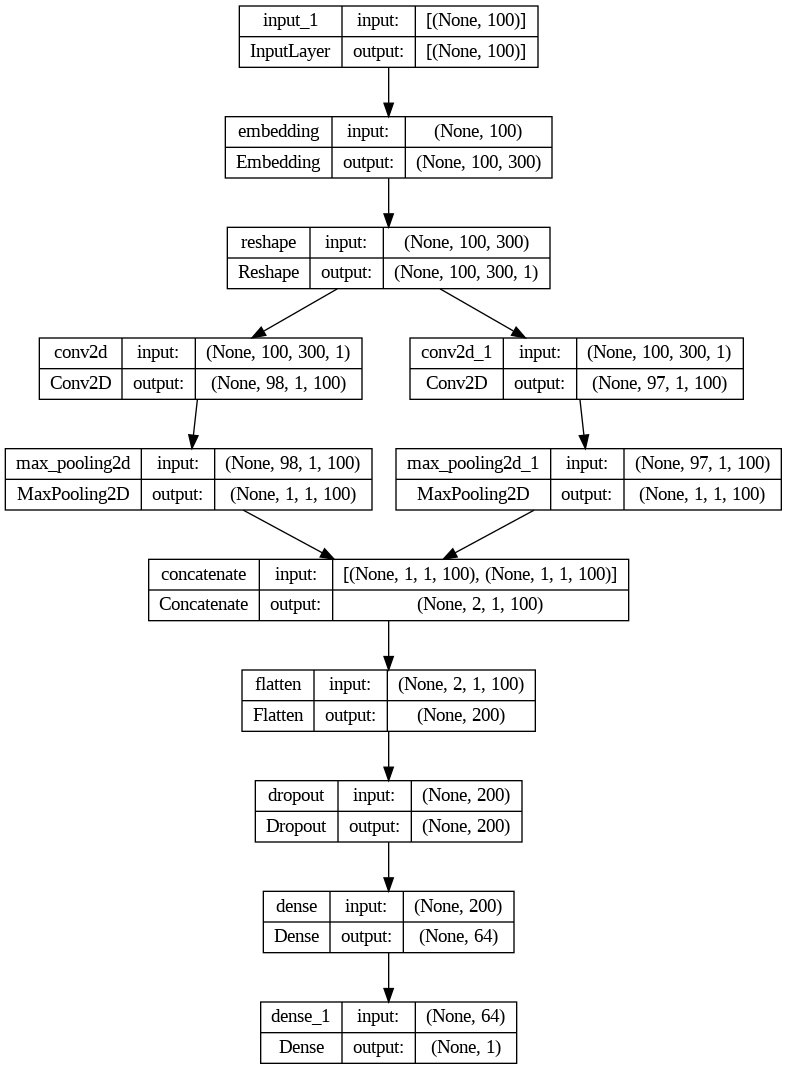

In [25]:
# from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [26]:
# Compiling Model using optimizer
# opt = Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fitting Model to the data
callbacks = [EarlyStopping(monitor='val_accuracy'), EarlyStopping(patience= 10), ModelCheckpoint(filepath='/content/model-CNN-glove.h5', save_best_only=True)]
# hist_adam = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=2, validation_data=(X_val, y_val),callbacks=callbacks)
  # starts training

In [27]:
hist=     model.fit(X_train, y_train,batch_size= 128, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=callbacks)  

Epoch 1/10
66/66 [==============================] - ETA: 0s - loss: 0.4616 - acc: 0.8415

66/66 [==============================] - 84s 634ms/step - loss: 0.4616 - acc: 0.8415 - val_loss: 0.4030 - val_acc: 0.8776
Epoch 2/10
66/66 [==============================] - ETA: 0s - loss: 0.3135 - acc: 0.9273

66/66 [==============================] - 11s 161ms/step - loss: 0.3135 - acc: 0.9273 - val_loss: 0.3740 - val_acc: 0.9004
Epoch 3/10
66/66 [==============================] - ETA: 0s - loss: 0.2179 - acc: 0.9671

66/66 [==============================] - 8s 117ms/step - loss: 0.2179 - acc: 0.9671 - val_loss: 0.4134 - val_acc: 0.8956
Epoch 4/10
66/66 [==============================] - ETA: 0s - loss: 0.1655 - acc: 0.9860

66/66 [==============================] - 7s 108ms/step - loss: 0.1655 - acc: 0.9860 - val_loss: 0.3738 - val_acc: 0.9127
Epoch 5/10
66/66 [==============================] - ETA: 0s - loss: 0.1268 - acc: 0.9904

66/66 [==============================] - 6s 86ms/step - loss: 0.1268 - acc: 0.9904 - val_loss: 0.3784 - val_acc: 0.9070
Epoch 6/10
66/66 [==============================] - ETA: 0s - loss: 0.1061 - acc: 0.9931

66/66 [==============================] - 5s 80ms/step - loss: 0.1061 - acc: 0.9931 - val_loss: 0.3725 - val_acc: 0.9013
Epoch 7/10
66/66 [==============================] - ETA: 0s - loss: 0.0907 - acc: 0.9950

66/66 [==============================] - 4s 50ms/step - loss: 0.0907 - acc: 0.9950 - val_loss: 0.3977 - val_acc: 0.9032
Epoch 8/10
64/66 [============================>.] - ETA: 0s - loss: 0.0801 - acc: 0.9961

66/66 [==============================] - 3s 45ms/step - loss: 0.0801 - acc: 0.9961 - val_loss: 0.3680 - val_acc: 0.9051
Epoch 9/10
66/66 [==============================] - ETA: 0s - loss: 0.0667 - acc: 0.9972

66/66 [==============================] - 3s 39ms/step - loss: 0.0667 - acc: 0.9972 - val_loss: 0.3709 - val_acc: 0.8918
Epoch 10/10
66/66 [==============================] - ETA: 0s - loss: 0.0651 - acc: 0.9963

66/66 [==============================] - 3s 44ms/step - loss: 0.0651 - acc: 0.9963 - val_loss: 0.3893 - val_acc: 0.8966


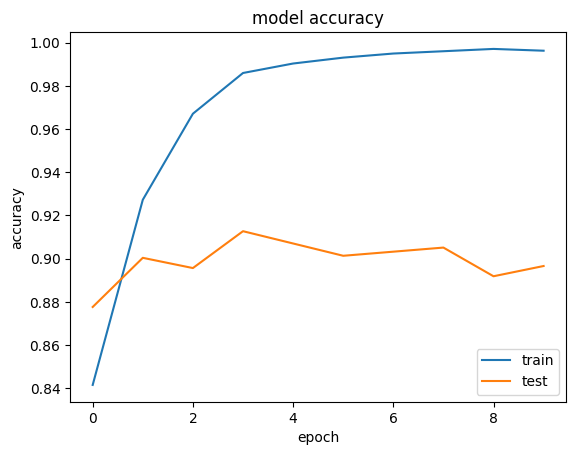

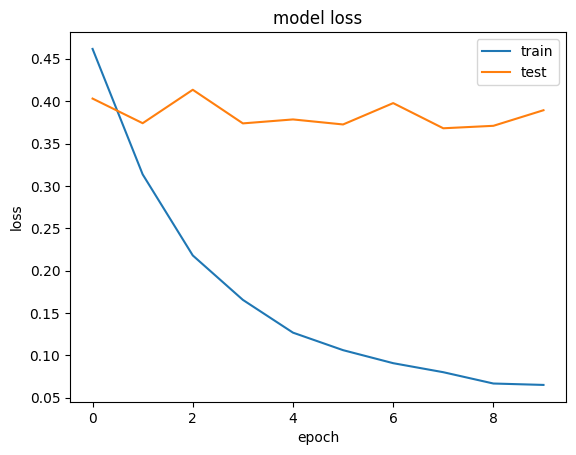

In [28]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

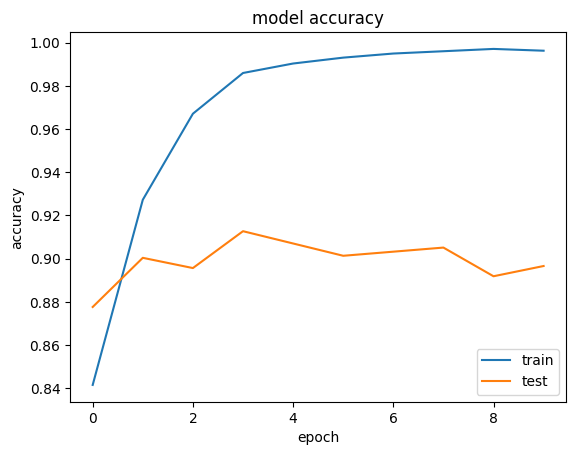

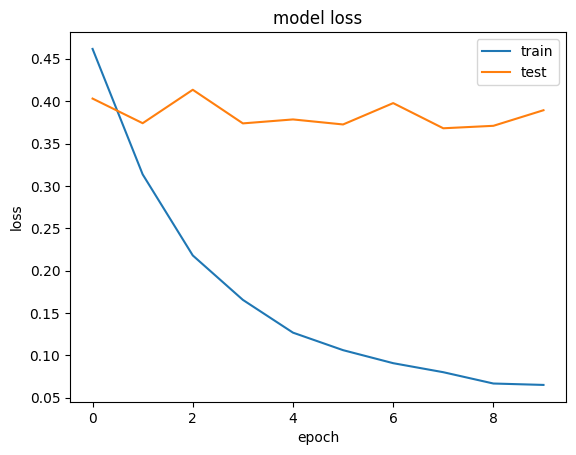

In [29]:
#copy
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [30]:
# convert test to sequence and padding the sequence
sequences_test=tokenizer.texts_to_sequences(X_test)
X_test2 = pad_sequences(sequences_test,maxlen=100)

In [31]:
# Creating empty prediction array
col =['Hostile/Non-Hostile']

# Predict on train, val and test datasets
pred_train = model.predict(X_train)
pred_test = model.predict(X_test2)
pred_val = model.predict(X_val)

# Emply array to collect AUC scores
AUC = np.zeros((3,6))
AUC

33/33 [==============================] - 0s 3ms/step


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [32]:
Y_pred = model.predict_generator(X_test2)
YPred = np.round_(Y_pred)
YPred

<ipython-input-32-0bf6ad0b081c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(X_test2)


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [33]:
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = YPred
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(f1_score(y_test, y_pred, average=None))

[0.83673469 0.94514768]
[0.8803681  0.92307692]
[0.85799701 0.93398193]


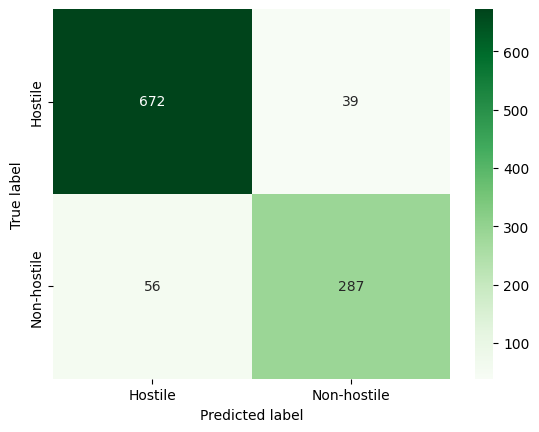

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix( y_pred,y_test)


new_conf_matrix = np.array([[conf_matrix[1][1], conf_matrix[1][0]], [conf_matrix[0][1], conf_matrix[0][0]]])

# Create heatmap
sns.heatmap(new_conf_matrix, annot=True, cmap="Greens", fmt='d')

# Define tick labels
tick_labels = ['Hostile', 'Non-hostile']  # Swap the order of the labels

# Set tick labels for the x-axis
plt.xticks(ticks=[0.5, 1.5], labels=tick_labels)

# Set tick labels for the y-axis
plt.yticks(ticks=[0.5, 1.5], labels=tick_labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.show()


In [35]:
from sklearn.metrics import classification_report
import numpy as np

from sklearn.metrics import classification_report
test_mesh_categories=['non-hostile','hostile']

y_true = y_test
y_pred = YPred

print(classification_report(y_true, y_pred, target_names=test_mesh_categories))

              precision    recall  f1-score   support

 non-hostile       0.84      0.88      0.86       326
     hostile       0.95      0.92      0.93       728

    accuracy                           0.91      1054
   macro avg       0.89      0.90      0.90      1054
weighted avg       0.91      0.91      0.91      1054



**Bi LSTM**

In [36]:

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D, Bidirectional, LSTM, GRU
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [37]:
# sequence_length = X_train.shape[1]
# num_classes = 1
# drop = 0.4
# lstm_units = 32

# inputs = Input(shape=(sequence_length,))
# embedding = embedding_layer(inputs)
# lstm = Bidirectional(LSTM(units=lstm_units, dropout=drop, recurrent_dropout=drop))(embedding)
# dense = Dense(64)(lstm)
# output = Dense(num_classes, activation='softmax')(dense)

# define model parameters
sequence_length = X_train.shape[1]
num_classes = 1
drop = 0.4
lstm_units = 32

# define model architecture
inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)
lstm = Bidirectional(LSTM(units=lstm_units, dropout=drop, recurrent_dropout=drop))(embedding)
dense1 = Dense(64, activation='relu')(lstm)
dropout1 = Dropout(drop)(dense1)
dense2 = Dense(32, activation='relu')(dropout1)
dropout2 = Dropout(drop)(dense2)
output = Dense(num_classes, activation='sigmoid')(dropout2)


model = Model(inputs, output)


In [38]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          5475600   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               85248     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                           

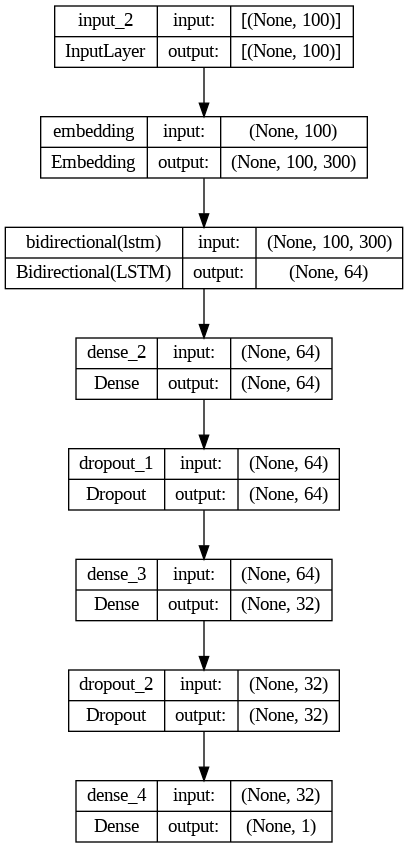

In [39]:
# from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [40]:
# Compiling Model using optimizer
# opt = Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fitting Model to the data
callbacks = [EarlyStopping(monitor='val_accuracy'), EarlyStopping(patience= 10), ModelCheckpoint(filepath='/content/model-CNN-glove.h5', save_best_only=True)]
#hist_adam = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=2, validation_data=(X_val, y_val),callbacks=callbacks)




In [41]:
hist=     model.fit(X_train, y_train,batch_size= 128, epochs=10, verbose=1, validation_data=(X_val, y_val))  

Epoch 1/10
66/66 [==============================] - 77s 1s/step - loss: 0.3353 - acc: 0.8527 - val_loss: 0.3237 - val_acc: 0.9013
Epoch 2/10
66/66 [==============================] - 66s 1s/step - loss: 0.0520 - acc: 0.9867 - val_loss: 0.4395 - val_acc: 0.9061
Epoch 3/10
66/66 [==============================] - 63s 963ms/step - loss: 0.0248 - acc: 0.9928 - val_loss: 0.4928 - val_acc: 0.9061
Epoch 4/10
66/66 [==============================] - 62s 940ms/step - loss: 0.0173 - acc: 0.9949 - val_loss: 0.5258 - val_acc: 0.9051
Epoch 5/10
66/66 [==============================] - 62s 949ms/step - loss: 0.0164 - acc: 0.9950 - val_loss: 0.5546 - val_acc: 0.9023
Epoch 6/10
66/66 [==============================] - 62s 940ms/step - loss: 0.0112 - acc: 0.9962 - val_loss: 0.6231 - val_acc: 0.9032
Epoch 7/10
66/66 [==============================] - 60s 905ms/step - loss: 0.0073 - acc: 0.9973 - val_loss: 0.7050 - val_acc: 0.9032
Epoch 8/10
66/66 [==============================] - 61s 931ms/step - loss: 

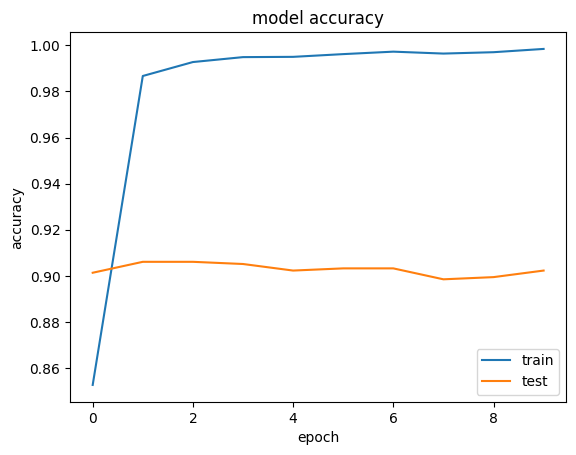

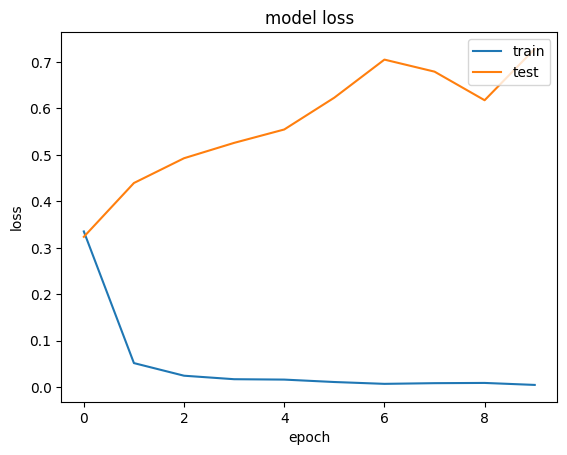

In [42]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

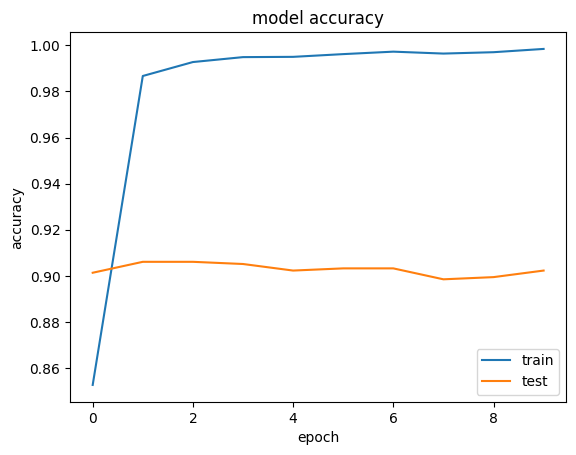

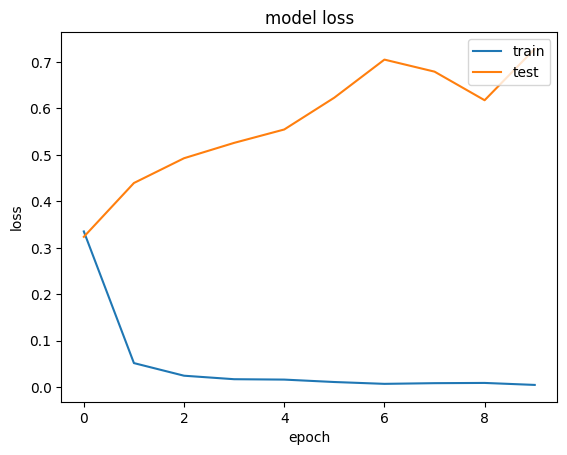

In [43]:
#copy
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [44]:
# convert test to sequence and padding the sequence
sequences_test=tokenizer.texts_to_sequences(X_test)
X_test2 = pad_sequences(sequences_test,maxlen=100)

In [53]:
# Creating empty prediction array
col = ["Hostile/Non-Hostile"]

# Predict on train, val and test datasets
pred_train = model.predict(X_train)
pred_test = model.predict(X_test2)
pred_val = model.predict(X_val)

# Emply array to collect AUC scores
AUC = np.zeros((3,6))
AUC

33/33 [==============================] - 3s 97ms/step


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [54]:
Y_pred = model.predict_generator(X_test2)
YPred = np.round_(Y_pred)
YPred
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = YPred
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(f1_score(y_test, y_pred, average=None))

<ipython-input-54-ed4bfd5453f6>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(X_test2)


[0.84684685 0.93897365]
[0.86503067 0.92994505]
[0.85584219 0.93443754]


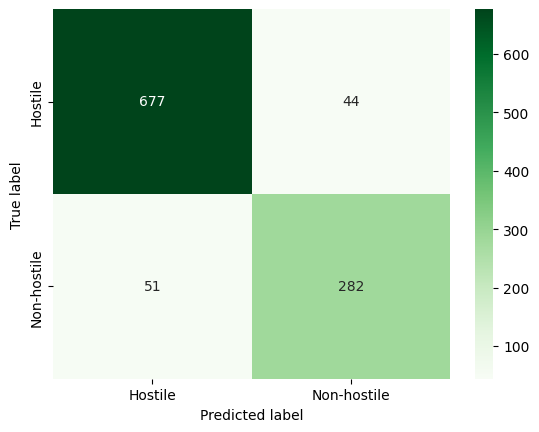

In [55]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix( y_pred,y_test)


new_conf_matrix = np.array([[conf_matrix[1][1], conf_matrix[1][0]], [conf_matrix[0][1], conf_matrix[0][0]]])

# Create heatmap
sns.heatmap(new_conf_matrix, annot=True, cmap="Greens", fmt='d')

# Define tick labels
tick_labels = ['Hostile', 'Non-hostile']  # Swap the order of the labels

# Set tick labels for the x-axis
plt.xticks(ticks=[0.5, 1.5], labels=tick_labels)

# Set tick labels for the y-axis
plt.yticks(ticks=[0.5, 1.5], labels=tick_labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.show()


In [56]:
from sklearn.metrics import classification_report
import numpy as np

from sklearn.metrics import classification_report
test_mesh_categories=['non-hostile','hostile']

y_true = y_test
y_pred = YPred

print(classification_report(y_true, y_pred, target_names=test_mesh_categories))

              precision    recall  f1-score   support

 non-hostile       0.85      0.87      0.86       326
     hostile       0.94      0.93      0.93       728

    accuracy                           0.91      1054
   macro avg       0.89      0.90      0.90      1054
weighted avg       0.91      0.91      0.91      1054



**CNN+BILSTM**


In [58]:
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, concatenate, Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

# Set hyperparameters
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 100
FILTERS = 128
KERNEL_SIZE = 5
LSTM_UNITS = 64
DROPOUT_RATE = 0.5
NUM_CLASSES = 1
LEARNING_RATE = 0.001
BATCH_SIZE = 128
NUM_EPOCHS = 10

# Define the inputs
inputs = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Define the embedding layer
# embedding_layer = Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)

# Apply the embedding layer to the inputs
embedded_sequences = embedding_layer(inputs)

# Define the CNN layers
conv1 = Conv1D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu')(embedded_sequences)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
conv2 = Conv1D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu')(max_pool1)
max_pool2 = MaxPooling1D(pool_size=2)(conv2)

# Flatten the output from the CNN layers
cnn_output = Flatten()(max_pool2)

# Define the BiLSTM layers
lstm = Bidirectional(LSTM(units=LSTM_UNITS, dropout=DROPOUT_RATE, recurrent_dropout=DROPOUT_RATE))(embedded_sequences)

# Define the output layer
output = Dense(NUM_CLASSES, activation='sigmoid')(concatenate([cnn_output, lstm]))

# Define the model
model = Model(inputs, output)

# Compile the model
optimizer = Adam(lr=LEARNING_RATE)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
hist = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


66/66 [==============================] - 72s 961ms/step - loss: 0.1351 - accuracy: 0.9457 - val_loss: 0.5767 - val_accuracy: 0.9023
Epoch 2/10
66/66 [==============================] - 64s 966ms/step - loss: 0.0109 - accuracy: 0.9970 - val_loss: 0.5973 - val_accuracy: 0.9023
Epoch 3/10
66/66 [==============================] - 61s 928ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.7252 - val_accuracy: 0.9070
Epoch 4/10
66/66 [==============================] - 68s 1s/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.7094 - val_accuracy: 0.9051


In [59]:
history_dict = hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

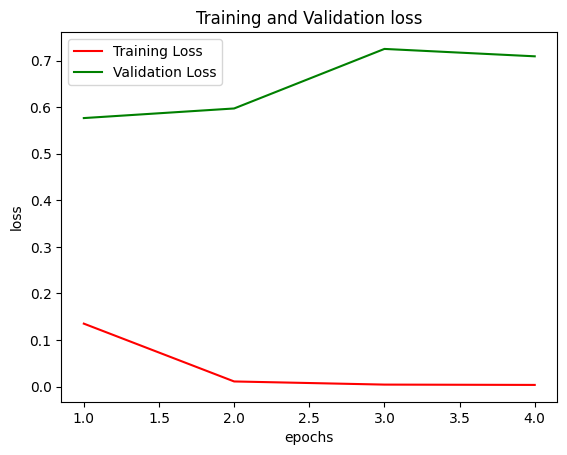

In [60]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

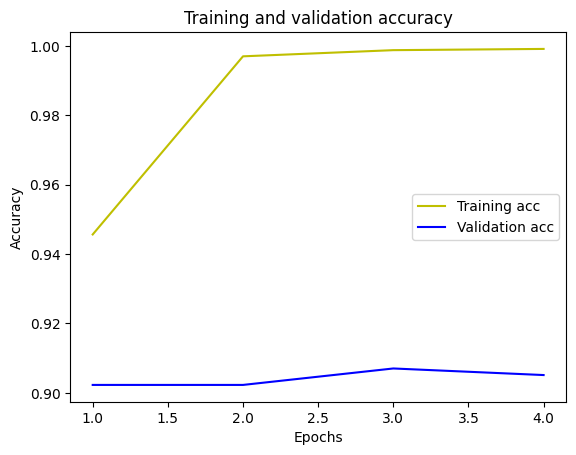

In [61]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [62]:
# convert test to sequence and padding the sequence
sequences_test=tokenizer.texts_to_sequences(X_test)
X_test2 = pad_sequences(sequences_test,maxlen=100)

In [63]:
# Creating empty prediction array
col = ["Hostile/Non-Hostile"]

# Predict on train, val and test datasets
pred_train = model.predict(X_train)
pred_test = model.predict(X_test2)
pred_val = model.predict(X_val)

# Emply array to collect AUC scores
AUC = np.zeros((3,6))
AUC

33/33 [==============================] - 2s 58ms/step


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [64]:
Y_pred = model.predict_generator(X_test2)
YPred = np.round_(Y_pred)
YPred

<ipython-input-64-0bf6ad0b081c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(X_test2)


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [65]:
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = YPred
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(f1_score(y_test, y_pred, average=None))

[0.86206897 0.93061224]
[0.84355828 0.93956044]
[0.85271318 0.93506494]


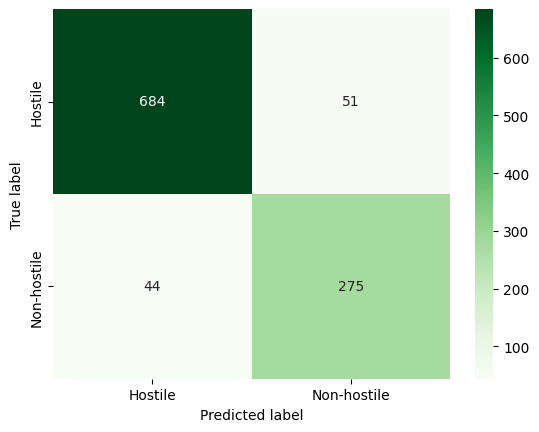

In [66]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix( y_pred,y_test)


new_conf_matrix = np.array([[conf_matrix[1][1], conf_matrix[1][0]], [conf_matrix[0][1], conf_matrix[0][0]]])

# Create heatmap
sns.heatmap(new_conf_matrix, annot=True, cmap="Greens", fmt='d')

# Define tick labels
tick_labels = ['Hostile', 'Non-hostile']  # Swap the order of the labels

# Set tick labels for the x-axis
plt.xticks(ticks=[0.5, 1.5], labels=tick_labels)

# Set tick labels for the y-axis
plt.yticks(ticks=[0.5, 1.5], labels=tick_labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.show()


In [67]:
from sklearn.metrics import classification_report
import numpy as np

from sklearn.metrics import classification_report
test_mesh_categories=['non-hostile','hostile']

y_true = y_test
y_pred = YPred

print(classification_report(y_true, y_pred, target_names=test_mesh_categories))

              precision    recall  f1-score   support

 non-hostile       0.86      0.84      0.85       326
     hostile       0.93      0.94      0.94       728

    accuracy                           0.91      1054
   macro avg       0.90      0.89      0.89      1054
weighted avg       0.91      0.91      0.91      1054

